### Black Friday
Black Friday is an informal name for the Friday following Thanksgiving Day in the United States, which is celebrated on the fourth Thursday of November. The day after Thanksgiving has been regarded as the beginning of America's Christmas shopping season.Many stores offer highly promoted sales on Black Friday and open very early, such as at midnight, or may even start their sales at some time on Thanksgiving. Black Friday is not an official holiday, but California and some other states observe "The Day After Thanksgiving" as a holiday for state government employees.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#To visualize the whole grid
pd.options.display.max_columns = 999
sns.set_style('ticks')
plt.style.use('ggplot')


In [2]:
df=pd.read_csv('train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


What we can understand from information?
1.	Total samples in our dataset are 5,50,068 (no of rows)
2.	This dataset has 12 features (no of columns)
3.	Only Product Category 2 and 3 have missing values => total no of non-nulls are less than total samples
4.	There are 2 features of float type, 5 features of int type, 5 features of object type (String)
5.	Stay_In_Current_City_Years is a number but the type it is showing is object (String) let us find why?
 
6.	Age in dataset is range so it is Object (String)
7.	Product category 2,3 are shown float let us find why?


In [5]:
df.isnull().sum() # sum of missing values with respect to columns

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

Only product category 2,3 have missing values. As the details of these columns were not specified **I assume** that the particular product doesn't come into any category in that field so let us replace them with
0.	(why with 0, in the below code you can check different unique values in that feature)


In [6]:
df['Product_Category_2'].unique() #gives different values in the column

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [7]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [8]:
df.fillna(0, inplace=True)

All the unique values after handling the missing values in product category 2,3 are integers. But the data type shown in info is float so we can change it by converting the numbers in float to integers.

In [9]:
df.Product_Category_3 = df.Product_Category_3.astype('int64')
df.Product_Category_2 = df.Product_Category_2.astype('int64')

In [10]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

Stay_In_Current_City_Years feature contains few values as strings("4+") so the data type remains Object.

In [11]:
sum(df.duplicated())

0

So the dataset doesn't contains any duplicated values. It is a good news

# Exploratory Data Analysis (EDA)

### Univariate Analysis

To get an idea of the distribution of numerical variables, histograms are an excellent starting point. Let’s begin by generating one
for Purchase, our target variable.

Text(0.5, 1.0, 'Purchase amount Distribution')

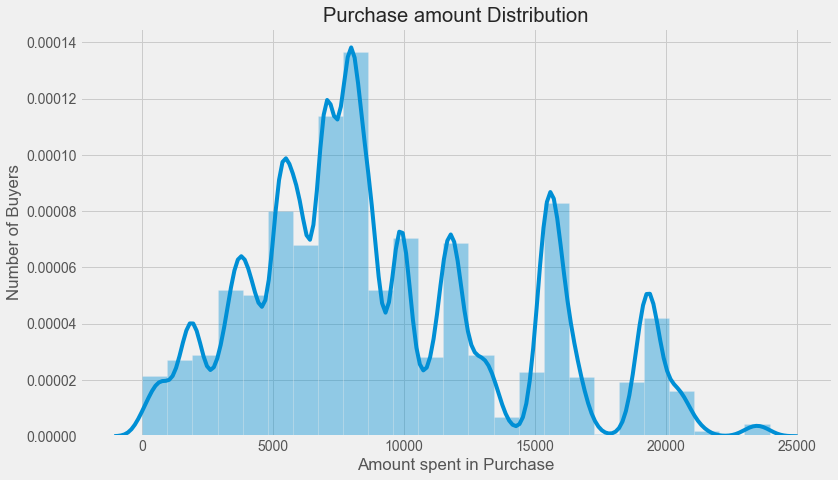

In [12]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(df.Purchase, bins = 25)
plt.xlabel("Amount spent in Purchase")
plt.ylabel("Number of Buyers")
plt.title("Purchase amount Distribution")

In [13]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969


In [14]:
df.Occupation.value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

<AxesSubplot:xlabel='Occupation', ylabel='count'>

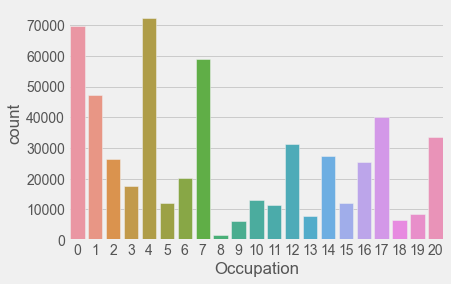

In [15]:
sns.countplot(df.Occupation)

### Distribution of the Marital_Status variable

In [16]:
df.Marital_Status.value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

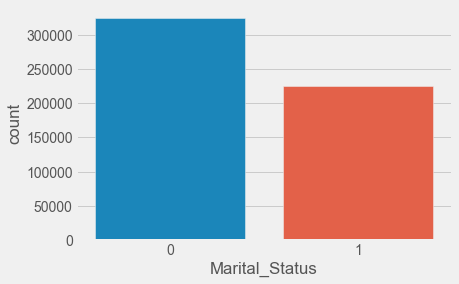

In [17]:
sns.countplot(df.Marital_Status)

### Distribution of the Product_Category_1 variable

In [18]:
df.Product_Category_1.value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

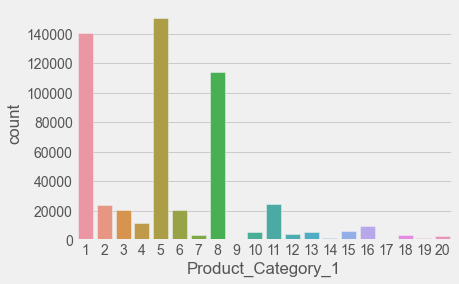

In [19]:
sns.countplot(df.Product_Category_1)

 ### Distribution of the Product_Category_2 variable

In [20]:
df.Product_Category_2.value_counts()

0     173638
8      64088
14     55108
2      49217
16     43255
15     37855
5      26235
4      25677
6      16466
11     14134
17     13320
13     10531
9       5693
12      5528
10      3043
3       2884
18      2770
7        626
Name: Product_Category_2, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '0'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18')])

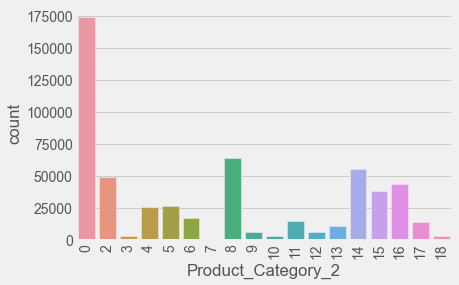

In [21]:
sns.countplot(df.Product_Category_2)
plt.xticks(rotation=90)

### Distribution of the Product_Category_3 variable

In [22]:
df.Product_Category_3.value_counts()

0     383247
16     32636
15     28013
14     18428
17     16702
5      16658
8      12562
9      11579
12      9246
13      5459
6       4890
18      4629
4       1875
11      1805
10      1726
3        613
Name: Product_Category_3, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '0'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '8'),
  Text(6, 0, '9'),
  Text(7, 0, '10'),
  Text(8, 0, '11'),
  Text(9, 0, '12'),
  Text(10, 0, '13'),
  Text(11, 0, '14'),
  Text(12, 0, '15'),
  Text(13, 0, '16'),
  Text(14, 0, '17'),
  Text(15, 0, '18')])

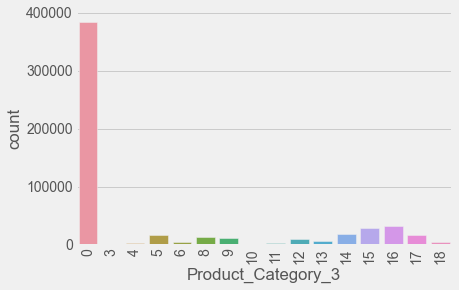

In [23]:
sns.countplot(df.Product_Category_3)
plt.xticks(rotation=90)

### Distribution of the variable Gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

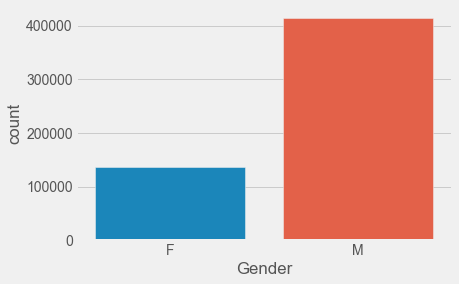

In [24]:
sns.countplot(df.Gender)

### Distribution of the variable Age

<AxesSubplot:xlabel='Age', ylabel='count'>

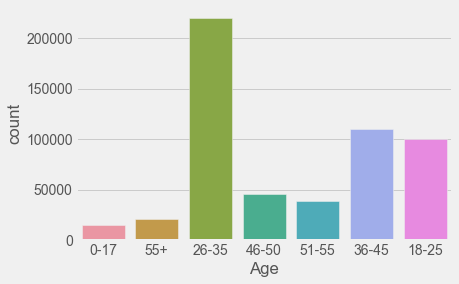

In [25]:
sns.countplot(df.Age)

### Distribution of the variable City_Category

<AxesSubplot:xlabel='City_Category', ylabel='count'>

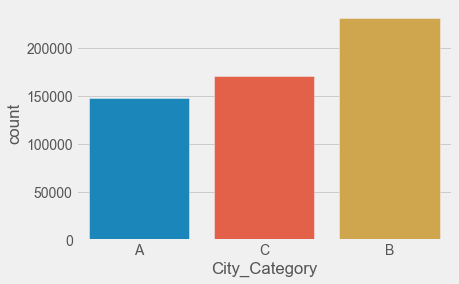

In [26]:
sns.countplot(df.City_Category)

### Distribution of the variable Stay_In_Current_City_Years

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

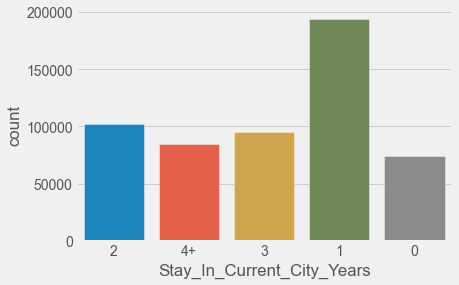

In [27]:
sns.countplot(df.Stay_In_Current_City_Years)

### Bivariate Distribution

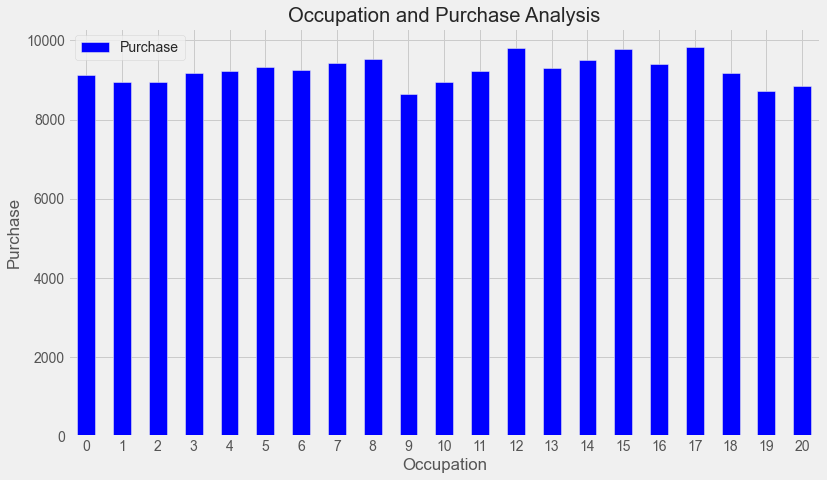

In [28]:
Occupation_pivot = \
df.pivot_table(index='Occupation', values="Purchase", aggfunc=np.mean)

Occupation_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Occupation")
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

### Marital_Status and Purchase Analysis

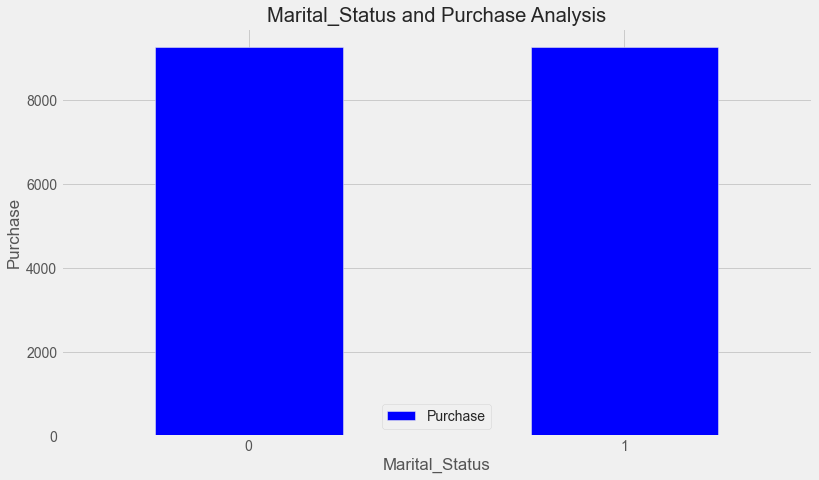

In [29]:
Marital_Status_pivot = \
df.pivot_table(index='Marital_Status', values="Purchase", aggfunc=np.mean)

Marital_Status_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Marital_Status")
plt.ylabel("Purchase")
plt.title("Marital_Status and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()


### Product_Category_1 and Purchase Analysis

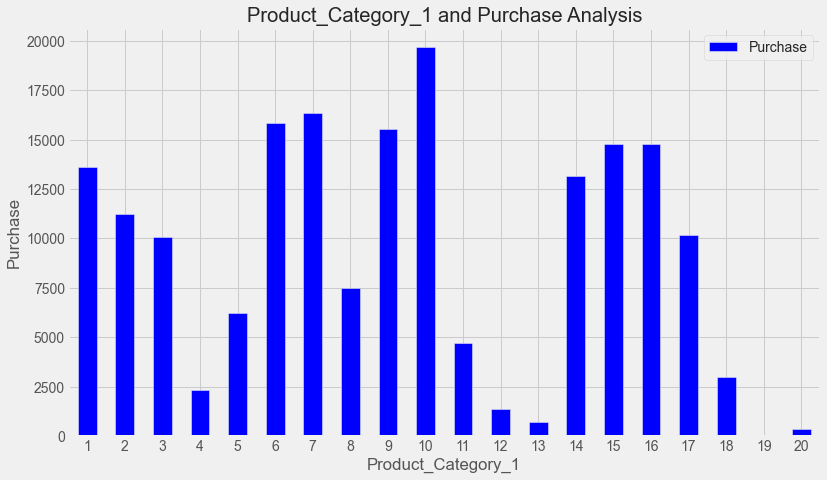

In [30]:
Product_category_1_pivot = \
df.pivot_table(index='Product_Category_1', values="Purchase", aggfunc=np.mean)

Product_category_1_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Product_Category_1")
plt.ylabel("Purchase")
plt.title("Product_Category_1 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

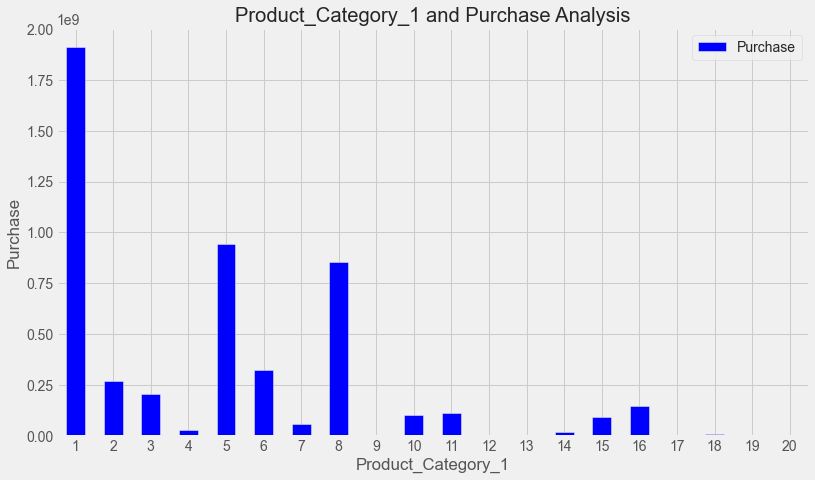

In [31]:
Product_category_1_pivot = \
df.pivot_table(index='Product_Category_1', values="Purchase", aggfunc=np.sum)

Product_category_1_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Product_Category_1")
plt.ylabel("Purchase")
plt.title("Product_Category_1 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

### Product_Category_2 and Purchase Analysis

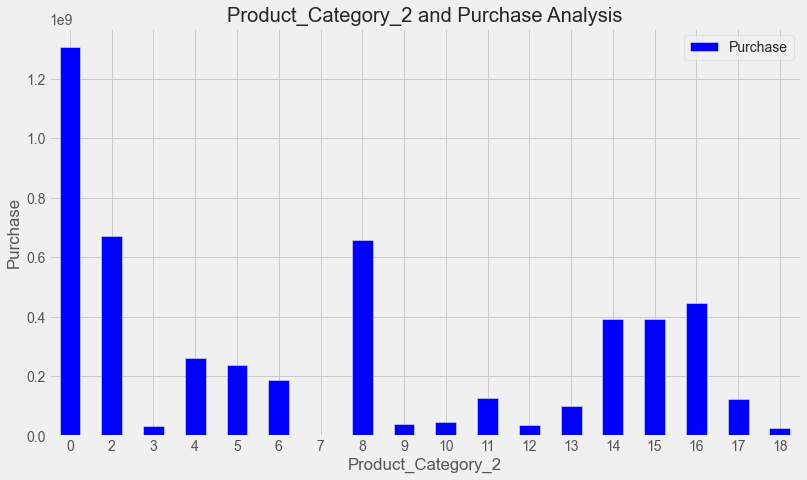

In [32]:
Product_category_1_pivot = \
df.pivot_table(index='Product_Category_2', values="Purchase", aggfunc=np.sum)

Product_category_1_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Product_Category_2")
plt.ylabel("Purchase")
plt.title("Product_Category_2 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

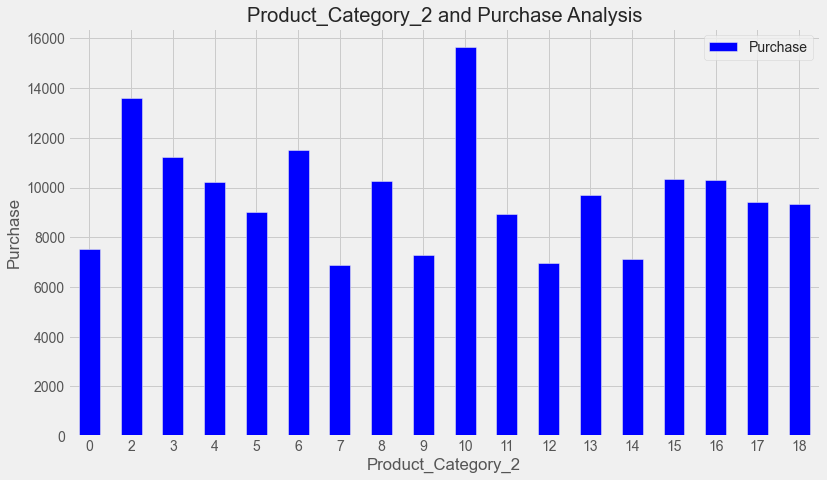

In [33]:
Product_category_1_pivot = \
df.pivot_table(index='Product_Category_2', values="Purchase", aggfunc=np.mean)

Product_category_1_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Product_Category_2")
plt.ylabel("Purchase")
plt.title("Product_Category_2 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

### Product_Category_3 and Purchase Analysis

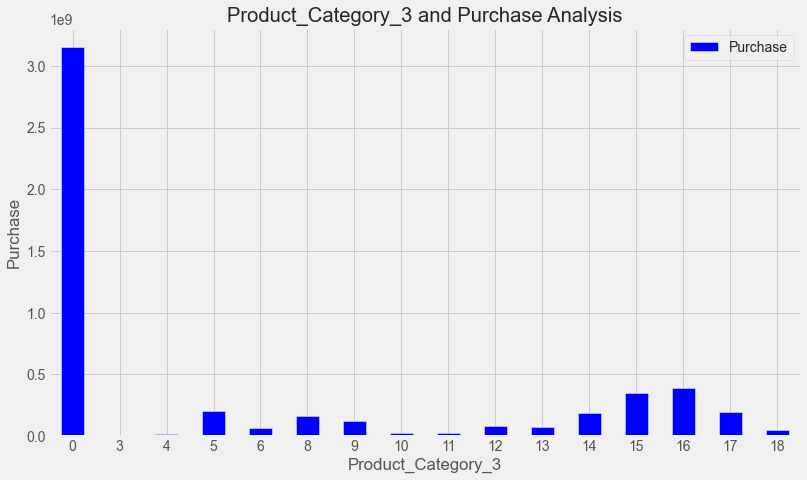

In [34]:
Product_category_1_pivot = \
df.pivot_table(index='Product_Category_3', values="Purchase", aggfunc=np.sum)

Product_category_1_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Product_Category_3")
plt.ylabel("Purchase")
plt.title("Product_Category_3 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

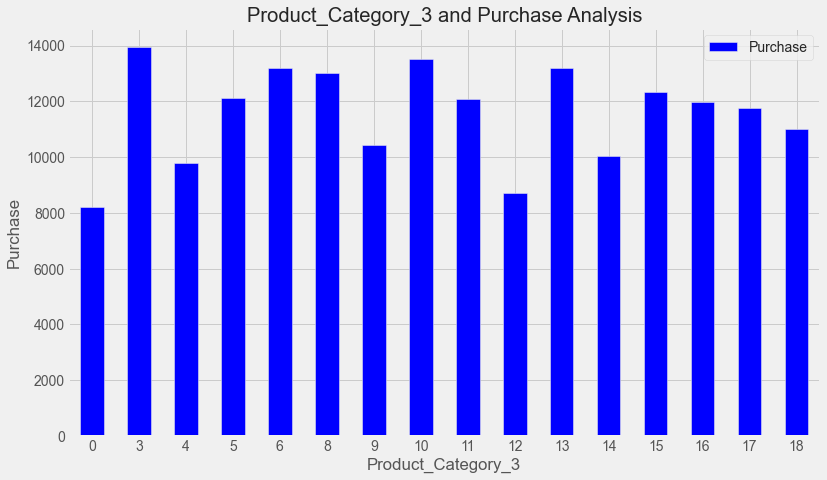

In [35]:
Product_category_1_pivot = \
df.pivot_table(index='Product_Category_3', values="Purchase", aggfunc=np.mean)

Product_category_1_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Product_Category_3")
plt.ylabel("Purchase")
plt.title("Product_Category_3 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

### Gender and Purchase Analysis

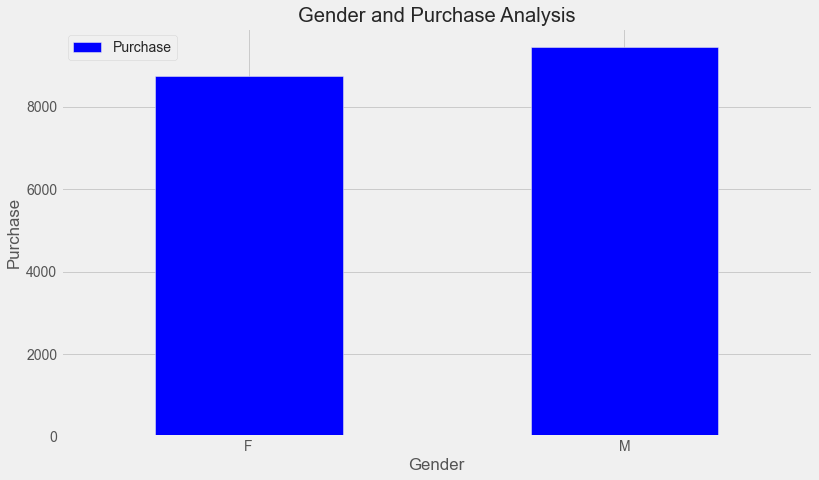

In [36]:
Product_category_1_pivot = \
df.pivot_table(index='Gender', values="Purchase", aggfunc=np.mean)

Product_category_1_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Gender")
plt.ylabel("Purchase")
plt.title("Gender and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

### Age and Purchase Analysis

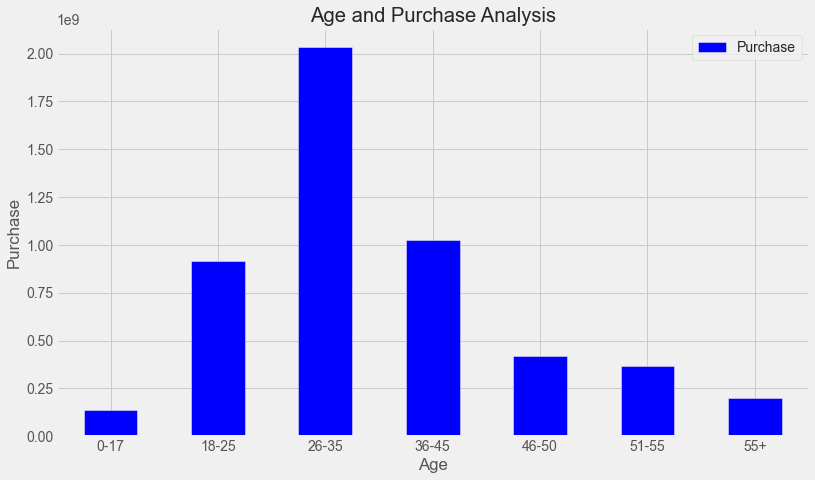

In [37]:
Product_category_1_pivot = \
df.pivot_table(index='Age', values="Purchase", aggfunc=np.sum)

Product_category_1_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Age")
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

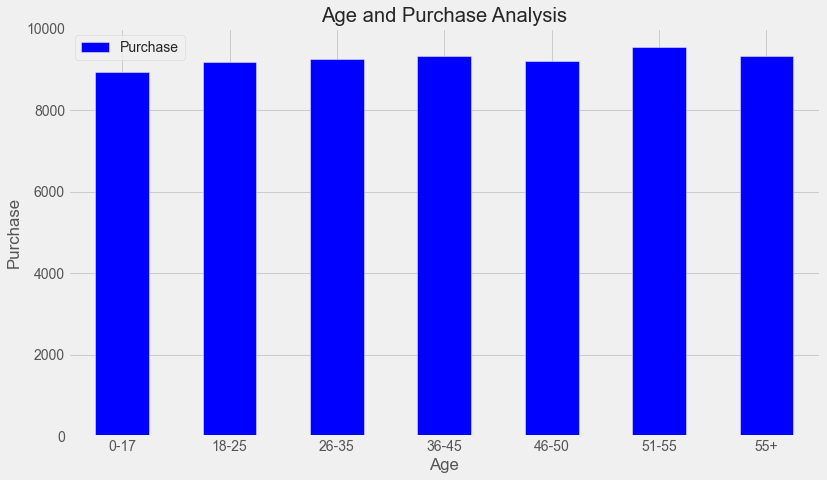

In [38]:
Product_category_1_pivot = \
df.pivot_table(index='Age', values="Purchase", aggfunc=np.mean)

Product_category_1_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Age")
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()


### City_Category and Purchase Analysis

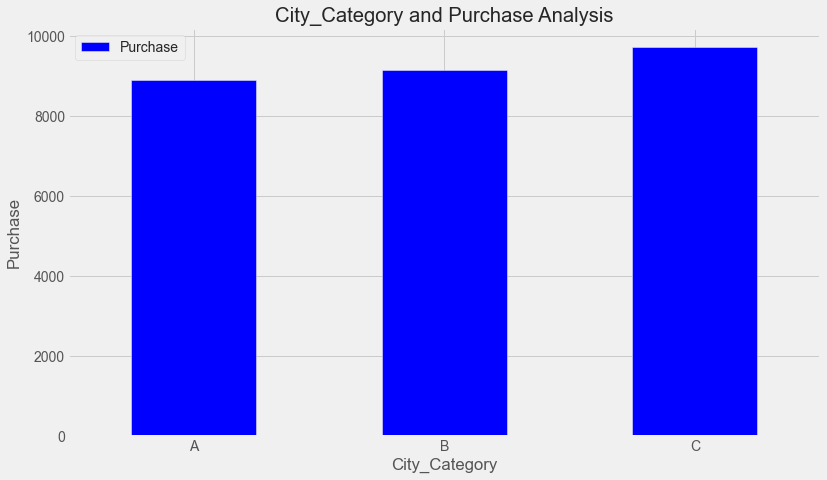

In [39]:
Product_category_1_pivot = \
df.pivot_table(index='City_Category', values="Purchase", aggfunc=np.mean)

Product_category_1_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("City_Category")
plt.ylabel("Purchase")
plt.title("City_Category and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

### Stay_in_Current_City_Years and Purchase Analysis

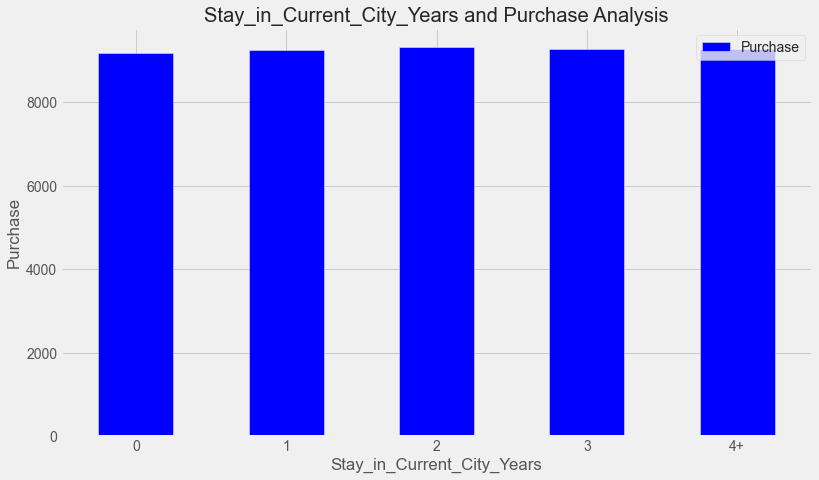

In [40]:
Product_category_1_pivot = \
.pivot_table(index='Stay_In_Current_City_Years', values="Purchase", aggfunc=np.mean)

Product_category_1_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Stay_in_Current_City_Years")
plt.ylabel("Purchase")
plt.title("Stay_in_Current_City_Years and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

Purchase vs. Gender

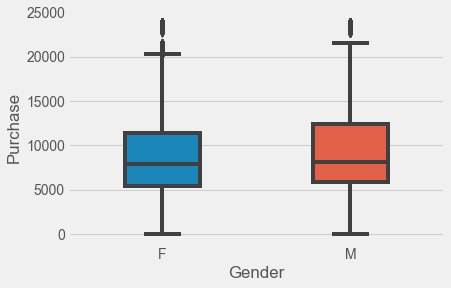

In [41]:
sns.boxplot(x='Gender',y='Purchase', data = df, width=0.4)
plt.show()

In [42]:
df.groupby('Gender').agg({'Purchase':['max','min','mean','median']}).round(3)

Purchase                     
            max min      mean median
Gender                              
F         23959  12  8734.566   7914
M         23961  12  9437.526   8098

### Purchase vs. Age

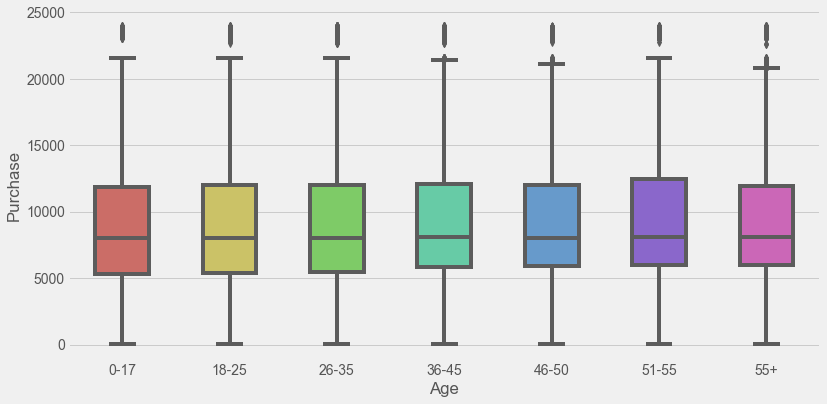

In [43]:
plt.figure(figsize=(12,6))
sns.boxplot(x = 'Age',y='Purchase', data = df,palette='hls',
            order=['0-17','18-25','26-35','36-45','46-50','51-55','55+'],width=0.5)
plt.show()

In [44]:
df.groupby('Age').agg({'Purchase':['min','max','mean']}).round(3)

Purchase                 
           min    max      mean
Age                            
0-17        12  23955  8933.465
18-25       12  23958  9169.664
26-35       12  23961  9252.691
36-45       12  23960  9331.351
46-50       12  23960  9208.626
51-55       12  23960  9534.808
55+         12  23960  9336.280

### Purchase vs. Occupation

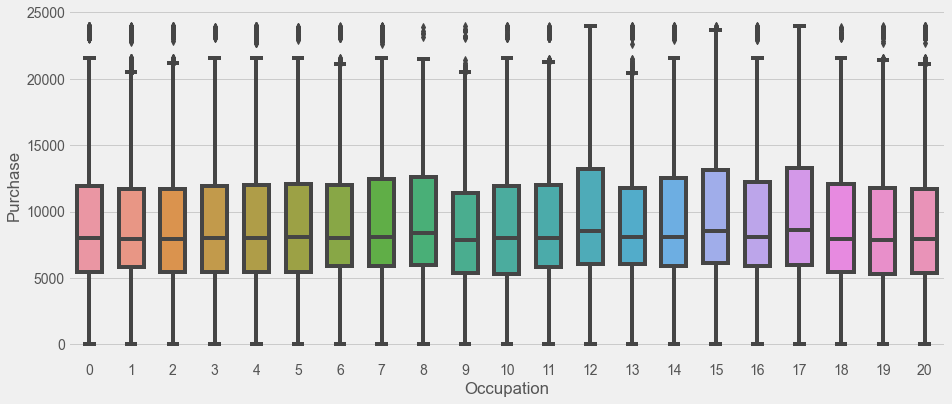

In [45]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Occupation',y='Purchase', data = df, width=0.6)
plt.show()

### Purchase vs. City_Category

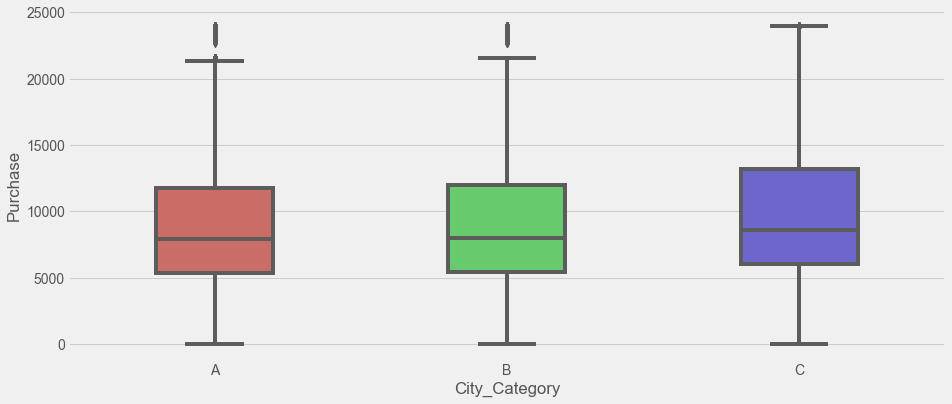

In [46]:
plt.figure(figsize=(14,6))
sns.boxplot(x='City_Category',y='Purchase', data = df,
            width=0.4,palette='hls',order=['A','B','C'])
plt.show()


### Purchase vs. Marital_Status

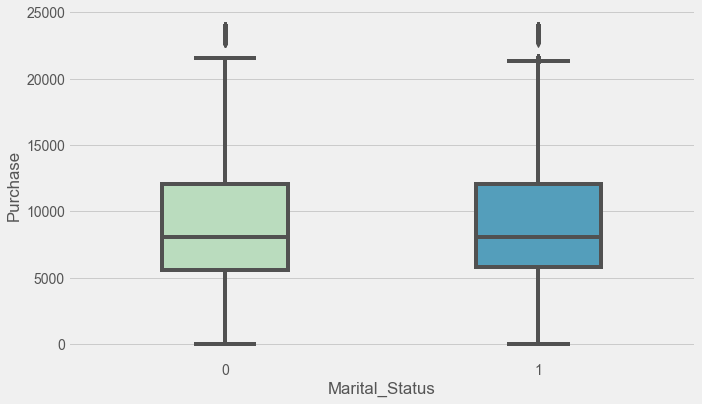

In [47]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Marital_Status',y='Purchase', data = df,
            width=0.4,palette='GnBu')
plt.show()

### Purchase vs. Stay_In_Current_City_Years

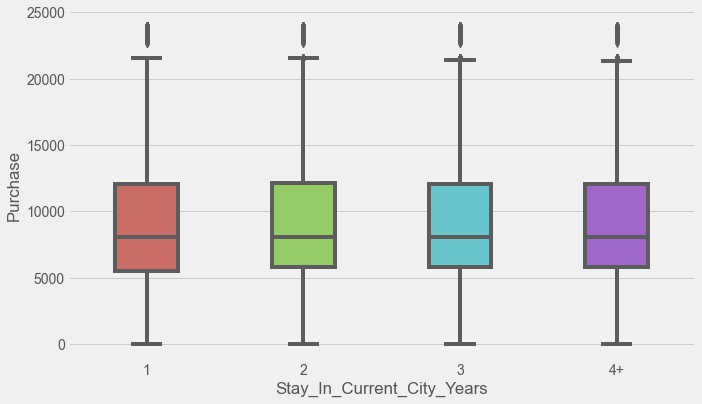

In [48]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Stay_In_Current_City_Years',y='Purchase', data = df,
            width=0.4,palette='hls',order=['1','2','3','4+'])
plt.show()

###  Purchase vs. Marital_Status

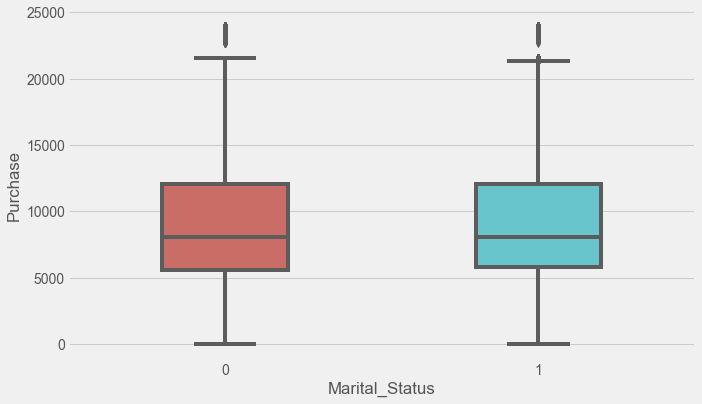

In [49]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Marital_Status',y='Purchase', data = df,
            width=0.4,palette='hls')
plt.show()

In [50]:
df.groupby('Marital_Status').agg({'Purchase':['min','max','mean']}).round(3)

Purchase                 
                    min    max      mean
Marital_Status                          
0                    12  23961  9265.908
1                    12  23961  9261.175

In [61]:
# Select Dataframe
age_group_city = df.loc[:,['Age', 'City_Category', 'Purchase']] 

# Pivot Table with Purchase Mean - datafame
age_group_city = age_group_city.pivot_table(age_group_city, index = ['Age', 'City_Category'], aggfunc = 'mean')

Text(0.5, 0, 'Purchase Mean')

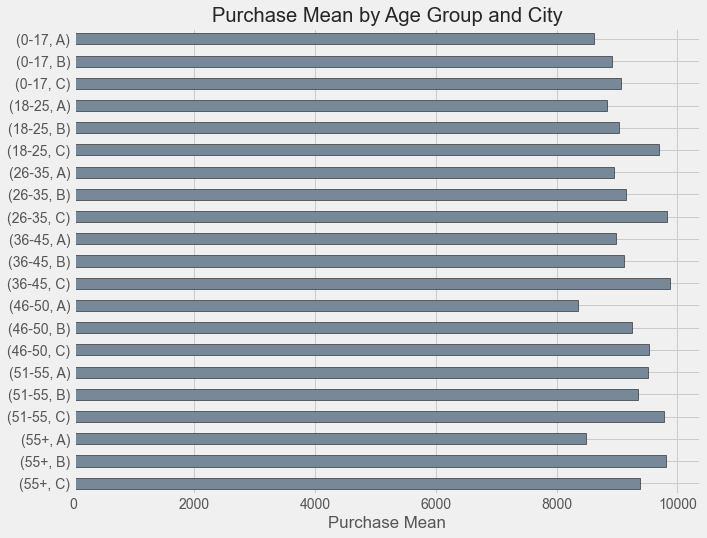

In [62]:
# Bar Colors
color = ['lightslategray','mediumvioletred','sandybrown']

age_group_city.sort_index(ascending=False).plot(
    kind='barh',
    figsize=(10, 8),
    cmap='viridis',
    edgecolor='black',
    fontsize=14,
    legend = False,
    title='Purchase Mean by Age Group and City',
    color = color
    ).yaxis.label.set_visible(False)
plt.ylabel('Age_Group, City')
plt.xlabel('Purchase Mean')

In [63]:
##"This function takes the an axes list, the number of plots and sets  the axes list with correct length"
def trim_axs(axs, N):
    axs = axs.flatten()
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

In [64]:
def individual_bar_plots(dataframe, item, title, ax = None):
    

    obj = dataframe.loc[item,:]  # Select item

    obj.plot( kind = 'barh',
            color = color,
            edgecolor = 'black', 
            ax = ax,   
            legend = None,              
            ).set_title(f'{title} {item}')
    
    ax.set_xlabel('Purchase Mean [$]')

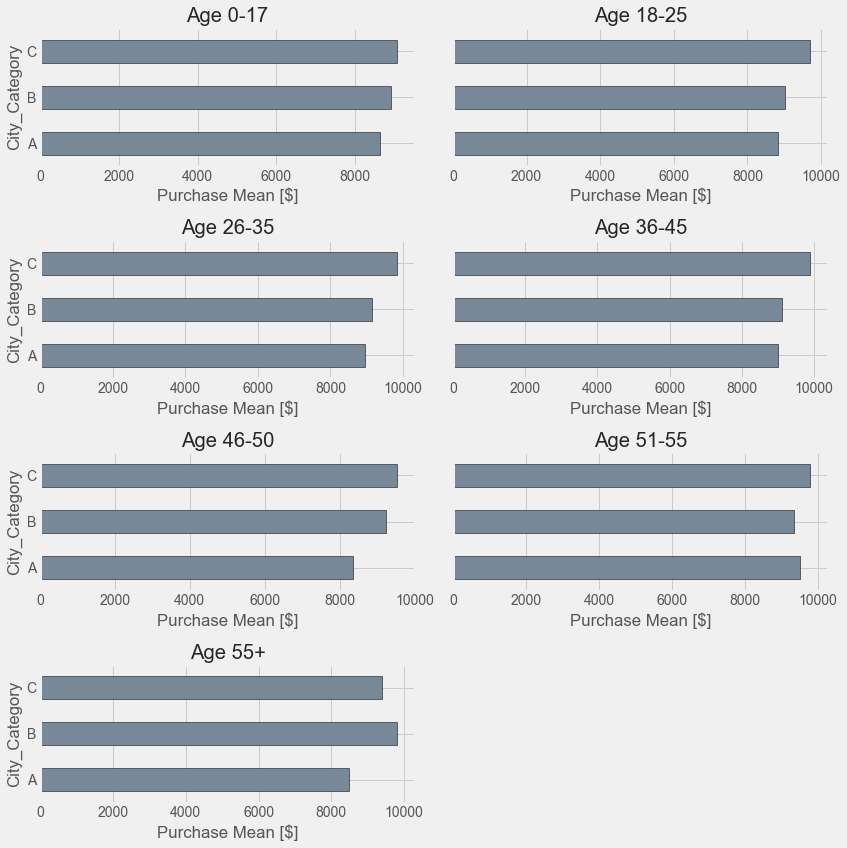

In [68]:
# Setup for the 4x2 subplot grid
# We don't want to share the x axis, only the y axis 
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12, 12), sharey=True)

# Correct the lenght of the ax
ax = trim_axs(ax, len(df.Age.unique()))

# Age Groups list
age_list = ['0-17','18-25','26-35','36-45', '46-50','51-55','55+']

# ax.flatten() collapses the ax into one dimension array
for subplot, Age in zip(ax.flatten(), age_list):
    individual_bar_plots(age_group_city, Age, ax=subplot, title = 'Age')
    
plt.tight_layout()

Text(0.5, 1.0, 'Purchases of Each Product Category by City')

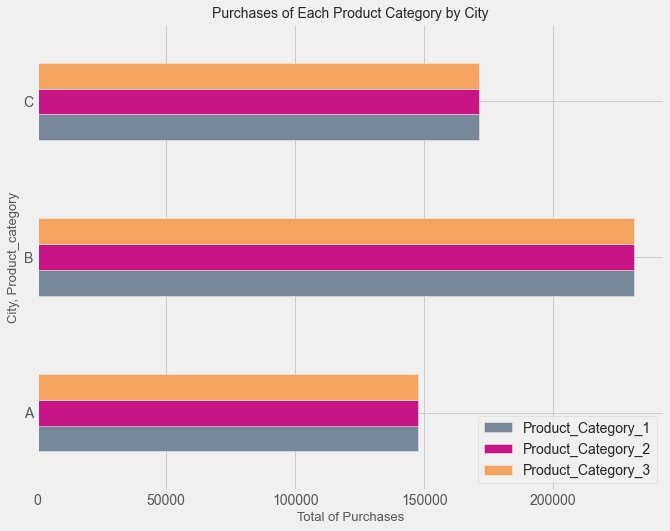

In [67]:
# Number of purchases of each product category by city

# Select Dataframe
Purchase_by_City_df = df.loc[:,[ 'City_Category','Product_Category_1', 'Product_Category_2','Product_Category_3']] 

# Pivot Table
Purchase_by_City_Pivt = Purchase_by_City_df.pivot_table(Purchase_by_City_df, index = ['City_Category'], aggfunc = 'count')

#Barplot
Purchase_by_City_Pivt.plot( kind = 'barh',figsize =(10,8), color = color)


#Create Legend
plt.xlabel('Total of Purchases', fontsize = 13)
plt.ylabel('City, Product_category', fontsize = 13)
plt.title('Purchases of Each Product Category by City', fontsize = 14 )

In [69]:
# Access rows and columns by city
df_city_A = df.loc[df.City_Category == 'A', :]
df_city_B = df.loc[df.City_Category == 'B', :]
df_city_C = df.loc[df.City_Category == 'C', :]

In [70]:
# Groupby each dataframe - Series with the number of purchases
City_A_Category_1 = df_city_A.groupby('Product_Category_1').mean()['Purchase']
City_B_Category_1 = df_city_B.groupby('Product_Category_1').mean()['Purchase']
City_C_Category_1 = df_city_C.groupby('Product_Category_1').mean()['Purchase']

# Concatenate all series
prod1_df = pd.concat([City_A_Category_1,City_B_Category_1, City_C_Category_1], axis = 1)
# Set columns name
prod1_df.columns = ['City_A', 'City_B', 'City_C']

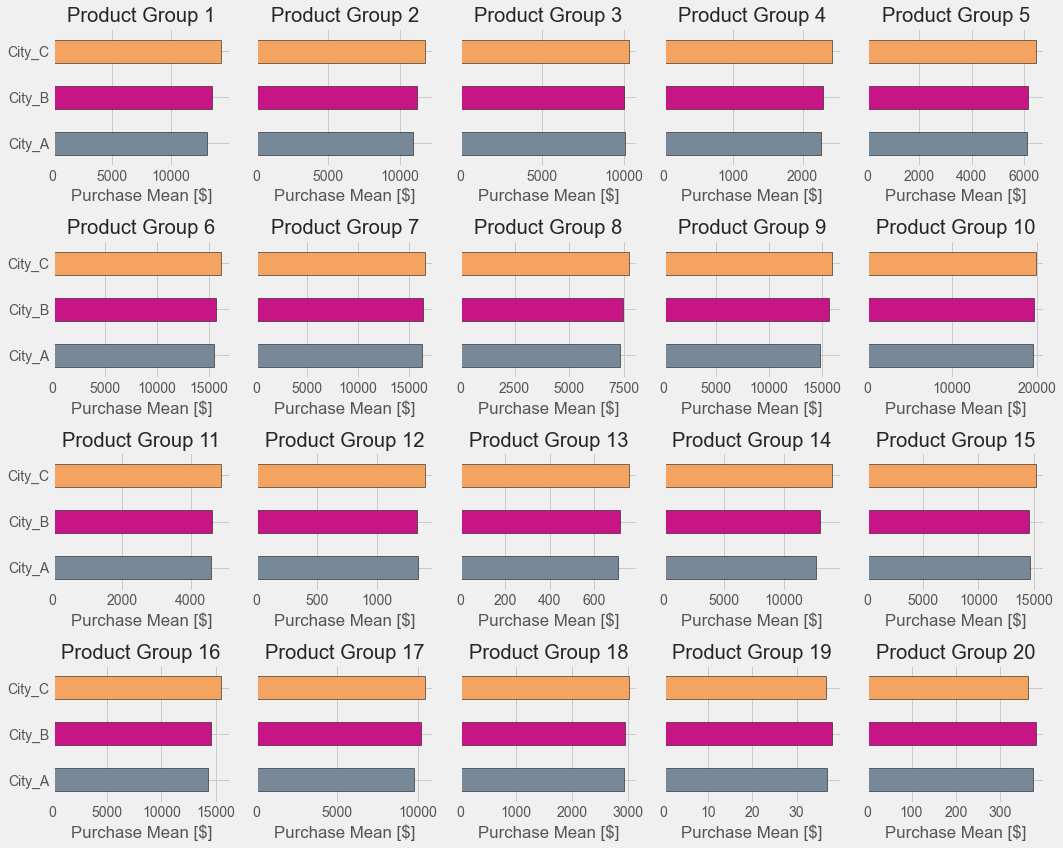

In [71]:
#setup 4 x 5 subplot grid
fig, ax = plt.subplots(nrows = 4 , ncols= 5, figsize = (15,12), sharey = True)

#correct the lenght of the ax
#ax = trim_axs(ax, len(df.Product_Category_1.unique()))

color = ['lightslategray','mediumvioletred','sandybrown']

product_category_1_list = sorted(list(df.Product_Category_1.unique()))

for subplot, product in zip(ax.flatten(),product_category_1_list ):
    individual_bar_plots(prod1_df,product,ax = subplot, title = 'Product Group')
    
plt.tight_layout()

In [72]:
# Select Series with Purchase Means
City_A_Category_2 = df_city_A.groupby('Product_Category_2').mean()['Purchase']
City_B_Category_2 = df_city_B.groupby('Product_Category_2').mean()['Purchase']
City_C_Category_2 = df_city_C.groupby('Product_Category_2').mean()['Purchase']

# Product 2 DataFrame
prod2_df = pd.concat([City_A_Category_2,City_B_Category_2,City_C_Category_2], axis = 1)
# Naming Columns
prod2_df.columns =['City_A', 'City_B', 'City_C']

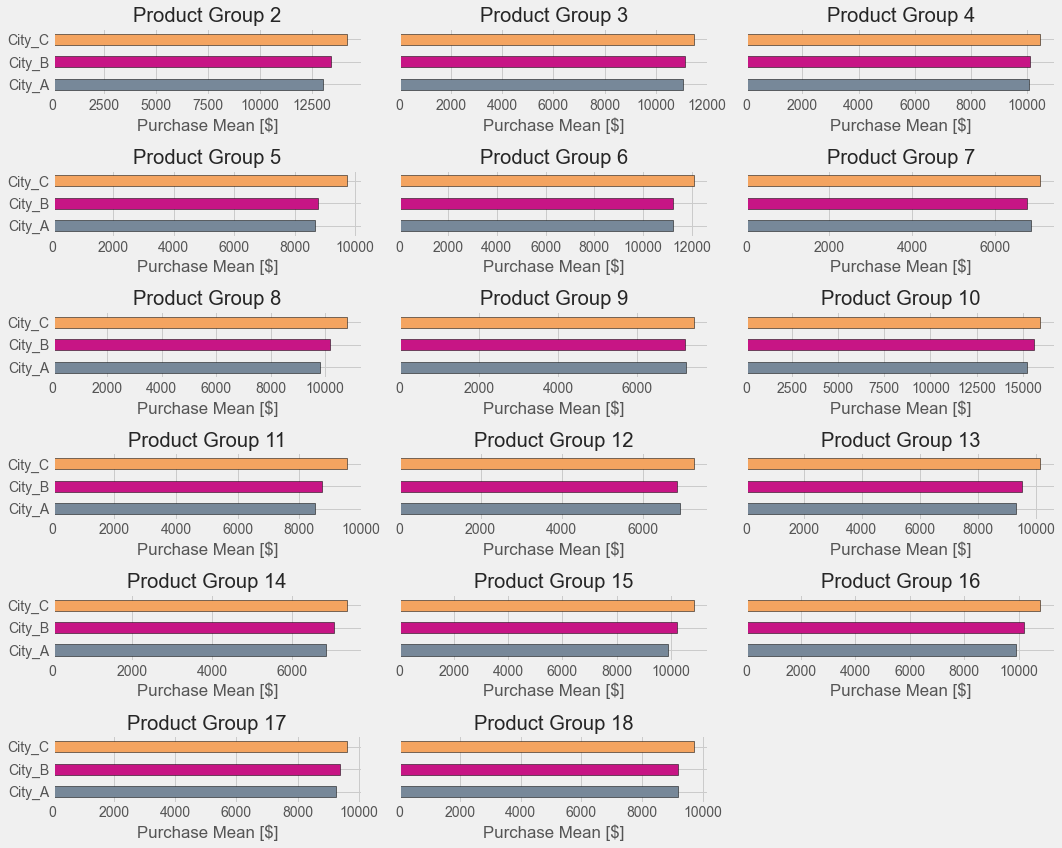

In [73]:
# Setup for the 6 X 3 subplot grid
fig, ax = plt.subplots(nrows=6 , ncols=3, sharey = True, figsize = (15,12))

#Correct the lenght of the ax
ax = trim_axs(ax, len(df.Product_Category_2.unique()[1:]) )

product_category_2_list = sorted(list(df.Product_Category_2.unique()[1:]))

for subplot, product in zip(ax.flatten(), product_category_2_list):
    individual_bar_plots(prod2_df,product,ax = subplot, title = 'Product Group')

plt.tight_layout()

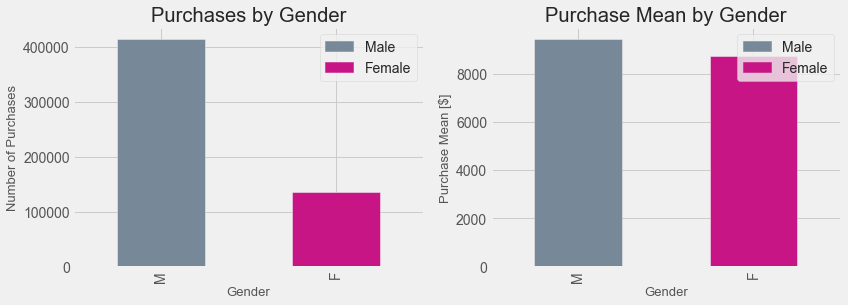

In [76]:
# Purchase Mean by Gender grouny
df.groupby('Gender').mean()['Purchase'].sort_values(ascending = False)

# Plotting Purchase by Gender
plt.subplot(221)

# Number of Males and Females
df.Gender.value_counts().plot(kind= 'bar', title = 'Purchases by Gender', color = color)

plt.xlabel('Gender', fontsize = 13)
plt.ylabel('Number of Purchases', fontsize = 13)
import matplotlib.patches as mpatches
gray_patch = mpatches.Patch(color ='lightslategray', label = 'Male')
violet_patch = mpatches.Patch(color = 'mediumvioletred', label = 'Female')
plt.legend(handles = [gray_patch,violet_patch], loc = 'best')

#Plotting Purchase Mean by Gender
plt.subplot(222)

df.groupby('Gender').mean()['Purchase'] .sort_values(ascending = False).plot(kind = 'bar',
                                                                         color = color,
                                                                         title = 'Purchase Mean by Gender')
                                                                    
plt.ylabel('Purchase Mean [$]', fontsize = 13)
plt.xlabel('Gender', fontsize = 13)
plt.legend(handles = [gray_patch,violet_patch], loc = 'best')
plt.tight_layout()

plt.rcParams['figure.figsize'] =(24,16)

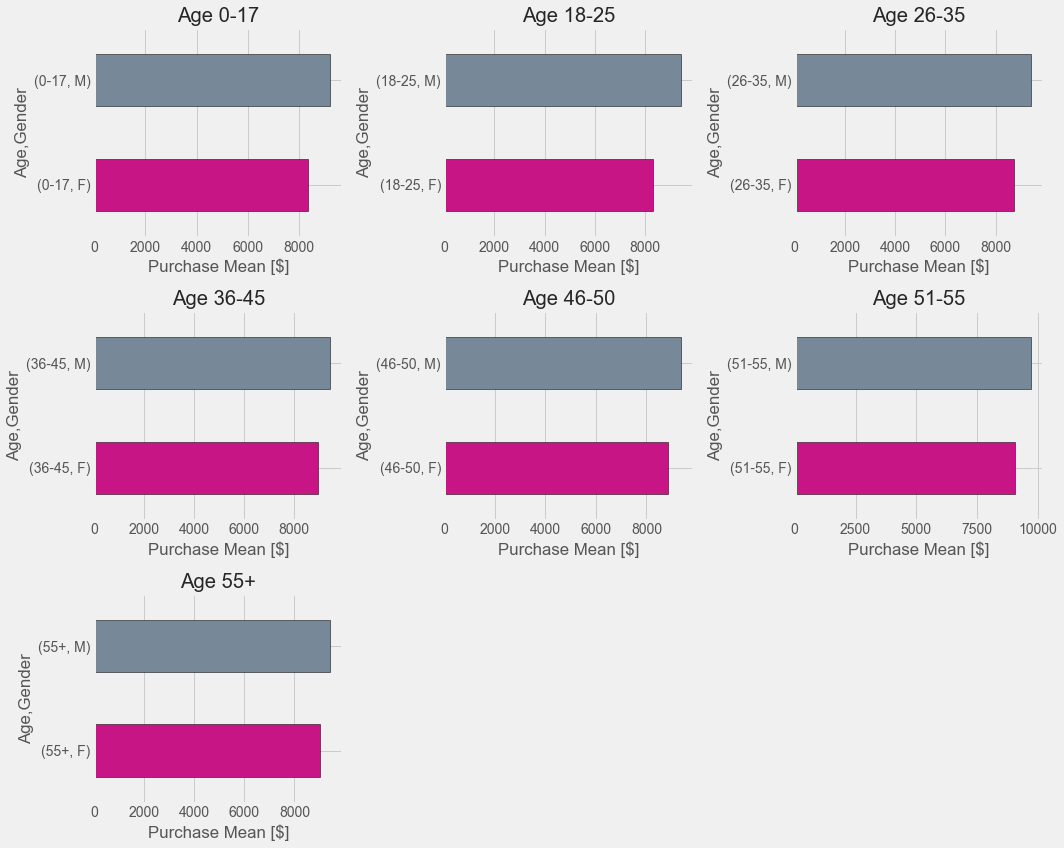

In [77]:
# DataFrme selection
gender_age_pvt = df.pivot_table(df , index = ['Age', 'Gender'], aggfunc = 'mean')['Purchase']

#Plot
fig, ax = plt.subplots(nrows = 3 , ncols= 3, figsize = (15,12), sharey = False)

#correct the lenght of the ax
ax = trim_axs(ax, len(df.Age.unique()))

# set colors
color = ['mediumvioletred','lightslategray']

for subplot, Age in zip(ax.flatten(),age_list ):
    individual_bar_plots(gender_age_pvt,Age,ax = subplot, title = 'Age')
    
plt.tight_layout()

In [78]:
# Encoding Age Group
def age_encoder(age_group):
    
    if age_group == '0-17':
        x = 1
        
    elif age_group == '18-25':
        x = 2
    
    elif age_group == '26-35':
        x = 3
        
    elif age_group == '36-45':
        x = 4 
        
    elif age_group == '46-50':
        x = 5
        
    elif age_group == '51-55':
        x = 6
        
    elif age_group == '55+':
        x = 7
        
    return x

In [107]:
df.columns

Index(['User_ID', 'Prod_ID', 'Gender', 'Age', 'Occupation', 'City',
       'Years_In_Citys', 'Marital_St', 'Prod_Cat1', 'Prod_Cat2', 'Prod_Cat3',
       'Purchase'],
      dtype='object')

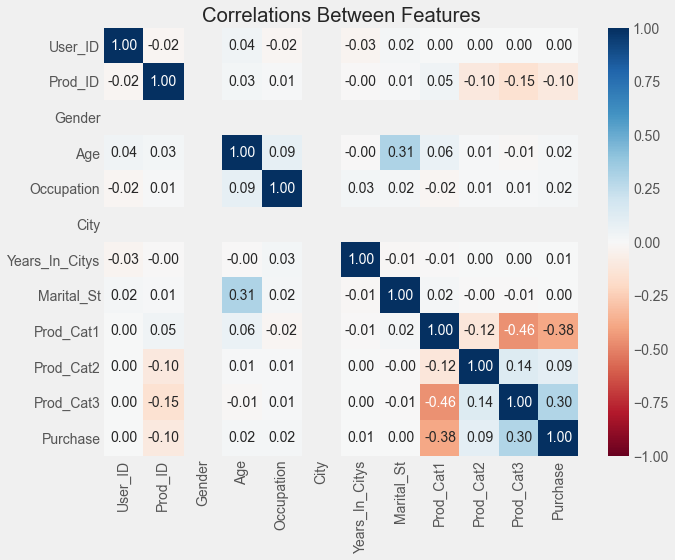

In [110]:
# Use Spearman instead of default Pearson, since we are working with
# ordinal variables!
corr_matrix = df.corr(method='spearman')

# Setup
fig, ax = plt.subplots(figsize=(10, 8))

# vmin and vmax control the range of the colormap
sns.heatmap(corr_matrix, cmap='RdBu', annot=True, fmt='.2f',
           vmin=-1, vmax=1)

plt.title("Correlations Between Features")

# Add tight_layout to ensure the labels don't get cut off
plt.tight_layout()
plt.show()

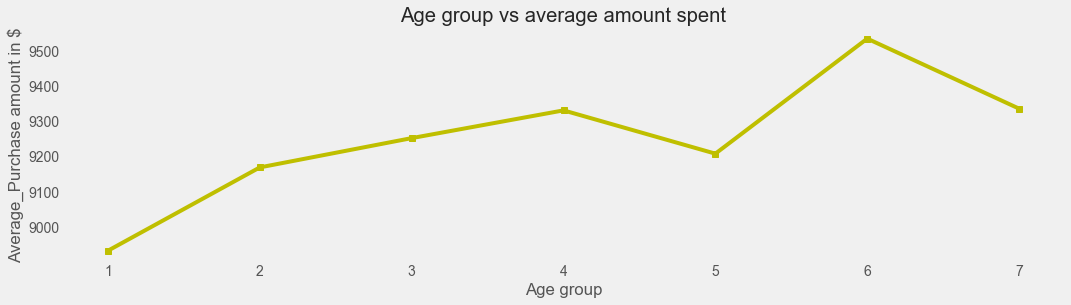

In [85]:
#1. which age group of customers are more likely to purchase with More amount per person?

data = df.groupby('Age')['Purchase'].mean()
data  = pd.DataFrame({'Age':data.index, 'Average_purchase':data.values})
plt.figure(figsize = (16,4))
plt.plot('Age','Average_purchase','ys-',data = data);
plt.grid();
plt.xlabel('Age group');
plt.ylabel('Average_Purchase amount in $');
plt.title('Age group vs average amount spent');

In [99]:
#2.which age group and gender have high visiting rate to the retail store?

data_Age = df.groupby('Age')['Age'].count()
data_Sex = df.groupby('Gender')['Gender'].count()
data_Age = pd.DataFrame({'Age':data_Age.index, 'Count':data_Age.values})
data_Sex = pd.DataFrame({'Sex':data_Sex.index, 'Count':data_Sex.values})


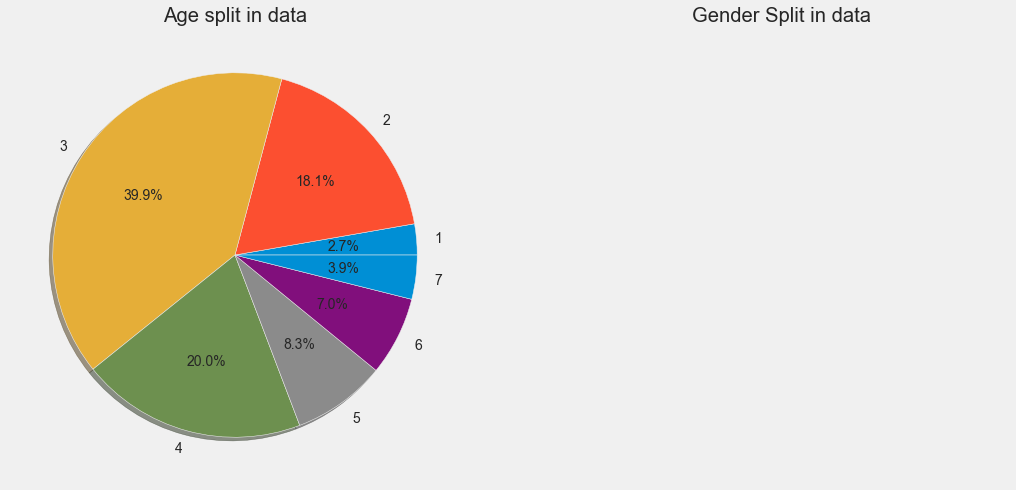

In [100]:
plt.figure(figsize = (16,16))
plt.subplot(121)
plt.pie(data_Age['Count'],labels = data_Age['Age'],autopct='%1.1f%%',shadow=True);
plt.title('Age split in data');
plt.subplot(122)
plt.pie(data_Sex['Count'],labels = data_Sex['Sex'],autopct='%1.1f%%',shadow=True);
plt.title('Gender Split in data');

In [104]:
df.head()

,User_ID,Prod_ID,Gender,Age,Occupation,City,Years_In_Citys,Marital_St,Prod_Cat1,Prod_Cat2,Prod_Cat3,Purchase
0,1000001,69042,NaN,1,10,10,2,0,3,0,0,8370
1,1000001,248942,NaN,1,10,10,2,0,1,6,14,15200
2,1000001,87842,NaN,1,10,10,2,0,12,0,0,1422
3,1000001,85442,NaN,1,10,10,2,0,12,14,0,1057
4,1000002,285442,NaN,7,16,30,4,0,8,0,0,7969


In [111]:
#Top 10 products which made highest sales in the store?

data1 = df.groupby('Prod_ID').agg({'Purchase':'sum'}).reset_index()
data2 = df['Prod_ID'].value_counts()
data2 = pd.DataFrame({'Prod_ID':data2.index, 'Count':data2.values})
data = pd.merge(data1,data2,left_on='Prod_ID',right_on='Prod_ID',how = 'left');

data = data.sort_values(['Purchase'],ascending=False)[0:10];

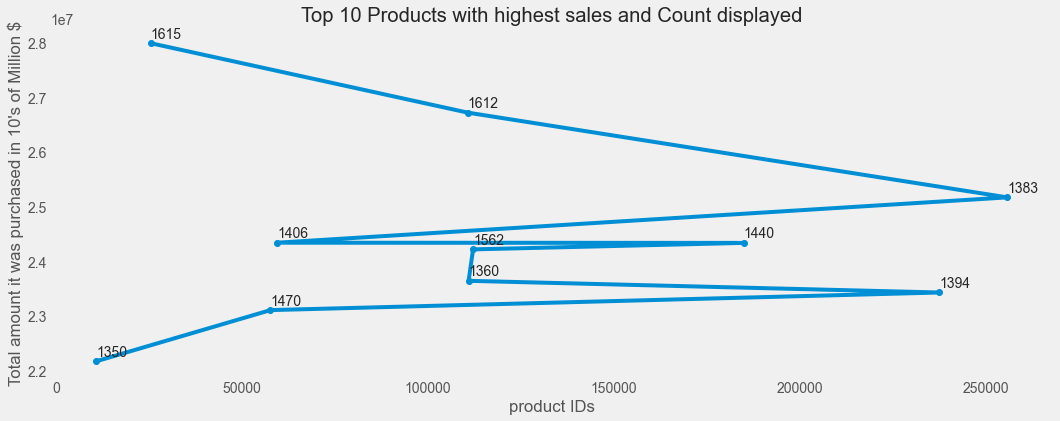

In [113]:
plt.figure(figsize=(16,6));
plt.grid();
plt.plot(data['Prod_ID'],data['Purchase'],'o-');
plt.xlabel('product IDs');
plt.ylabel('Total amount it was purchased in 10\'s of Million $');
plt.title('Top 10 Products with highest sales and Count displayed');
for a,b,c in zip(data['Prod_ID'], data['Purchase'], data['Count']): 
    plt.text(a, b+100000, str(c))  
plt.show();

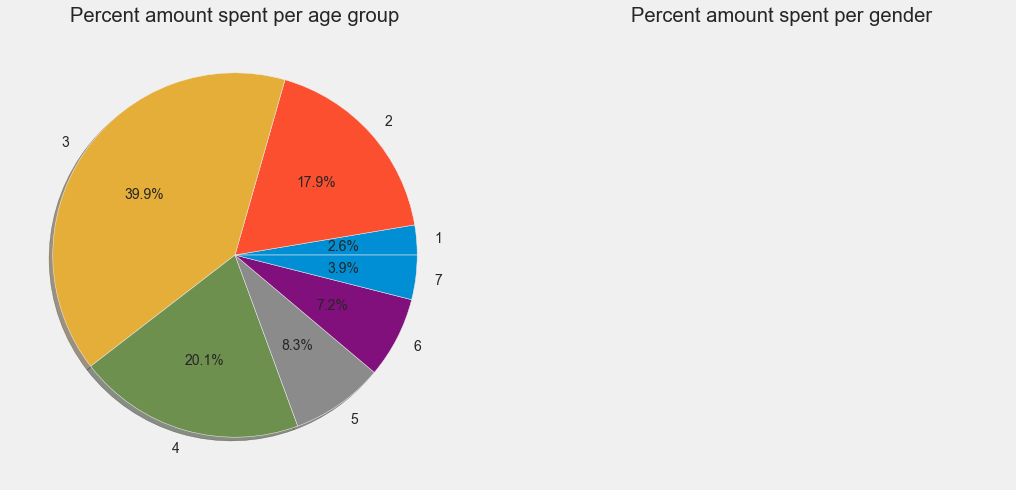

In [114]:
data = df.groupby('Age')['Purchase'].sum()
data_Sex = df.groupby('Gender')['Purchase'].sum()
plt.figure(figsize=(16,16));
plt.subplot(121)
plt.pie(data.values,labels = data.index,autopct='%1.1f%%',shadow=True);
plt.title('Percent amount spent per age group');
plt.subplot(122)
plt.pie(data_Sex.values,labels = data_Sex.index,autopct='%1.1f%%',shadow=True);
plt.title('Percent amount spent per gender');
